In [1]:
#Importing Libraries
from deepface import DeepFace 
from deepface.basemodels import Facenet
import cv2
import matplotlib.pyplot as plt

### Loading Images from File Directory and Identifying Emotions

In [2]:
#Set file path and images
FILE_PATH = 'C:/Users/rizbi/Downloads/Project/images/'
images = ['pic1.jpg' , 'pic4.jpg', ]

1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 42ms/step




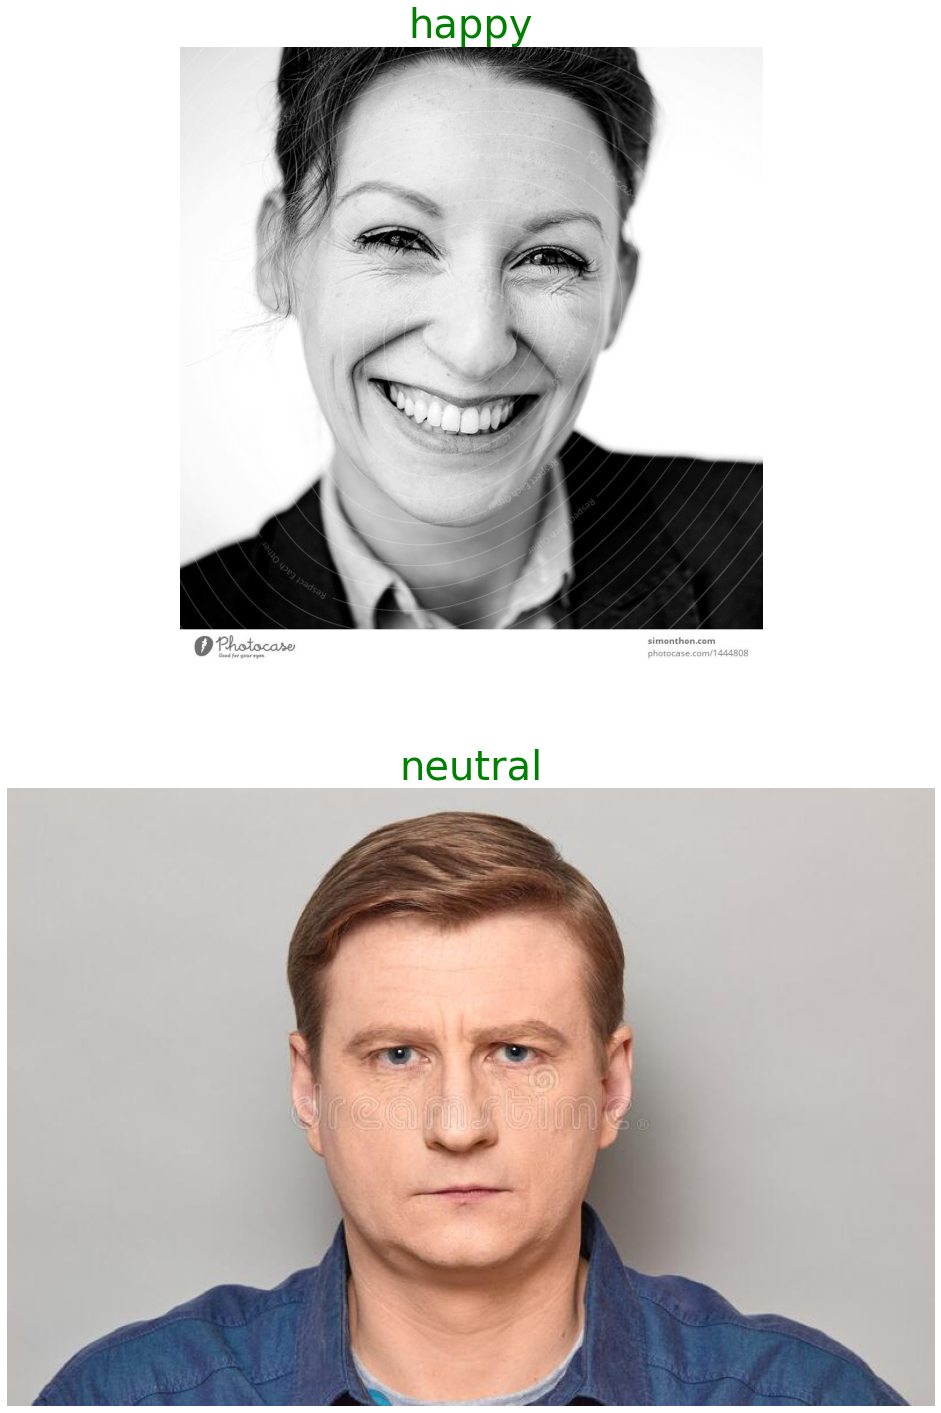

In [30]:
#Set Image size
plt.figure(figsize=(25, 25))
#Looping through the images
for num, img in enumerate(images):
    #Loading image from the directory
    image = cv2.imread(FILE_PATH+img,1)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #Identifying emotion using Deepface library
    result = DeepFace.analyze(img_path = image, 
                           actions = ['emotion'], 
                           models={'Facenet': Facenet.loadModel}, 
                           detector_backend='retinaface')
    print('\n')
    
    #Ploting the image with Adding dominant emotion as subplot
    plt.subplot(len(images),round(len(images)/2),num+1)
    plt.title(result['dominant_emotion'], fontsize=40,
          color="green")
    plt.axis('off')
    plt.imshow(image)

### Real-Time Video Capture Emotion Recognition

In [3]:
def plot_captured_image(img):
    """
    Plots the caputred image with emotion
    params:{img: Image file}
    """
    try:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        result = DeepFace.analyze(img_path = img, 
                               actions = ['emotion'], 
                               models={'Facenet': Facenet.loadModel},  
                               detector_backend='retinaface')
        plt.title(result['dominant_emotion'], fontsize=40,color="green")
        plt.axis('off')
        plt.imshow(img)
    except:
        print("No stable/clear face detected")

In [23]:
# Load the cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# To capture video from webcam. 
cap = cv2.VideoCapture(0)

# Check webcam open correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)

if not cap.isOpened():
    raise IOError("Cannot open webcam")
i=0
while True:
    # Reading the video as frame 
    _, img = cap.read()
    
    #Identifying emotion using Deepface library
    try:
        result = DeepFace.analyze(img_path = img, 
                           actions = ['emotion'],
                           models={'Facenet': Facenet.loadModel},        
                           detector_backend='retinaface')
         # Wrting emotion on the frame
        font = cv2.FONT_HERSHEY_SIMPLEX
  
        cv2.putText(img,result['dominant_emotion'],(50,50),font, 3,(0, 0, 255),2, cv2.LINE_4)
    
    except:
        print('No Stable/Clear Face Detected!!!')
    
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Detecting the faces
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    # Draw the rectangle around each face
    for (x, y, w, h) in faces:
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    
   
    # Display
    cv2.imshow('Video',img)
    
    
    key = cv2.waitKey(30) & 0xff
    # Press esc button to stop
    if key==27:
        break
    # Press SPACE button to capture image    
    elif key%256 == 32:
        plot_captured_image(img)
        i += 1
        break
        
# Release the VideoCapture object
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 38ms/step
No Stable/Clear Face Detected!!!
1/1 [==============================] - 0s 33ms/step
No Stable/Clear Face Detected!!!
1/1 [==============================] - 0s 33ms/step


### Using Capture Image Button and detecting emotion

In [5]:
from IPython.display import display, Image
import ipywidgets as widgets
import threading

In [13]:
# Capture Image button
# ================
captureButton = widgets.ToggleButton(
    value=False,
    description='Caputure Image',
    disabled=False,
    button_style='info', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='camera' # (FontAwesome names without the `fa-` prefix)
)

# Display function
# ================
def view(captureButton):
    
    cap = cv2.VideoCapture(0)
    display_handle=display(None, display_id=True)
    
    while True:
        _, frame = cap.read()
        img = cv2.flip(frame, 1) # if your camera reverses your image
        _, img = cv2.imencode('.jpeg', img)
        display_handle.update(Image(data=img.tobytes()))

        if captureButton.value==True:
            cv2.imwrite(str(FILE_PATH)+"captured_img.jpeg",frame)
            cap.release()
            display_handle.update(None) 
            break

# Run
# ===============
thread = threading.Thread(target=view, args=(captureButton,))
display(captureButton)
thread.start()

ToggleButton(value=False, button_style='info', description='Caputure Image', icon='camera', tooltip='Descripti…

None

In [ ]:
# Get the emotion from an the captured image
img = cv2.imread(FILE_PATH+"captured_img.jpeg")
plot_captured_image(img)